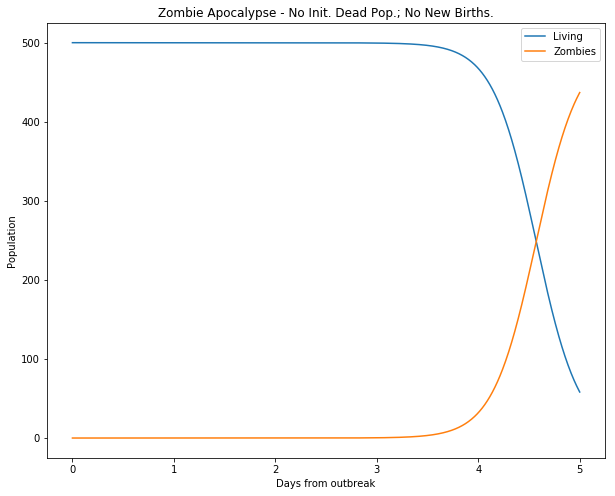

In [1]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['figure.figsize'] = 10, 8

P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)
plt.show()

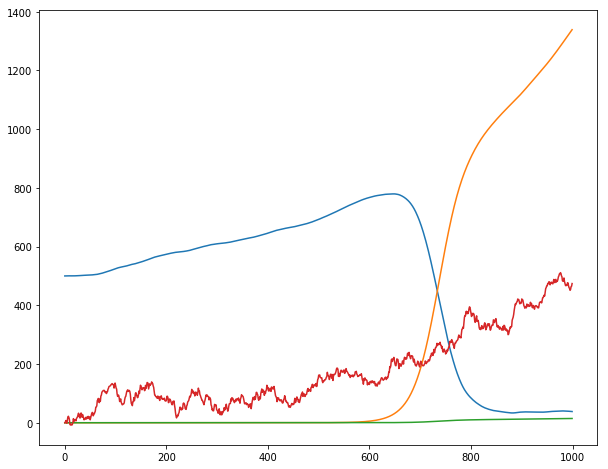

In [10]:
# Zombie apocalypse SDE model

import matplotlib.pyplot as plt
import numpy as np
import sdeint

P, d, B, G, A = 0.0001, 0.0001, 0.0095, 0.0001, 0.0001

tspan = np.linspace(0, 5., 1000)
y0 = np.array([500., 0., 0., P])


def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]

    f0 = y[3] - B * Si * Zi - d * Si
    f1 = B * Si * Zi + G * Ri - A * Si * Zi
    f2 = d * Si + A * Si * Zi - G * Ri
    f3 = 0
    return np.array([f0, f1, f2, f3])


def GG(y, t):
    return np.diag([0, 0, 0, 100])

result = sdeint.itoEuler(f, GG, y0, tspan)

plt.plot(result)
plt.show()